# KMeans with SciKit-Learn

Machine Learning with scikit-learn is easy. All the algorithms and helper functions that you might need are included as part of it. You'll still need to gather and clean your data. You'll need to know what algorithm to use and how to tune it for the specific problem that you are working on.

### References: ###
* [K-Means Clustering Explained by Soner Yildirim](https://towardsdatascience.com/k-means-clustering-explained-4528df86a120)
* [Understanding Boxplots by Michael Galarnyk](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
* [How to Use StandardScaler and MinMaxScaler Transforms in Python by Jason Brownlee](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)
* [How to Determine the Optimal K for K-Means by Khyati Mahendru](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

## Old Faithful ##

We'll continue to use the very simple, 2-D dataset from Old Faithful Geyser in Yellowstone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the same Old Faithful Geyser data that we used before
df = pd.read_csv('old_faithful_geyser.csv')
print(len(df))
df.head()

272


,Unnamed: 0,Eruption time,Waiting time
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [2]:
# Let's filter out the unused data and rename the columns
df.rename(columns={"Eruption time":"Eruption", "Waiting time":"Waiting"}, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Eruption,Waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Data Cleaning ##

Verify the quality of the data by looking for missing fields.

In [3]:
# What type of data do we have? Numerical data is the easiest to spot errors
df.dtypes

Eruption    float64
Waiting       int64
dtype: object

In [4]:
# It's numerical data, see if we're missing any fields
null_df = df.isnull()
null_df.head()

,Eruption,Waiting
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [34]:
# Let's count the number of nulls per row
null_count = null_df.sum(axis=1)
null_count.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [35]:
# Can't see all 272 rows, so put the worst offenders on top
null_count.sort_values(ascending=False)

0      0
179    0
185    0
184    0
183    0
      ..
96     0
97     0
98     0
99     0
271    0
Length: 272, dtype: int64

In [36]:
# One liner to show the top-10 rows that are worst offenders
df.isnull().sum(axis=1).sort_values(ascending=False)[:10]

0      0
179    0
185    0
184    0
183    0
182    0
181    0
180    0
178    0
1      0
dtype: int64

## Build the Model ##

All sklearn models are pretty much built the same way:
* Define a ML model - choose an algorithm and set any algorithm-specific options
* Train the model - usually with the `fit` function
* Test the model - make sure it is accurate enough (not shown here: only for ***supervised*** algorithms)
* Make predictions - usually with the `predict` function

In [37]:
from sklearn.cluster import KMeans

# Define the model: K-Means with 2 clusters
km = KMeans(n_clusters=2, max_iter=10)

# Fit the model to the data: runs K-Mean to find centroids
# note: the variable name "cluster_centers_" has been slightly different with older versions of sklearn
km.fit(df[['Eruption', 'Waiting']])
centroids = km.cluster_centers_

# Assign "new" samples to each centroid; for data-mining, we often just use the original data
clusters = km.predict(df[['Eruption', 'Waiting']])

In [38]:
# Let's look at the output
print(centroids)
print()
print(clusters)

[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


## Visualize the Results ##

Clustering algorithms are unique because we don't have labeled data to test against. Since this is a 2-D problem, we can just look at a plot and see if "looks" right. There are more sophisiticated measurements that allow us to quantify the accuracy. These are important for problems of higher dimension. We aren't going to worry about them for now... just plot the thing.

[]

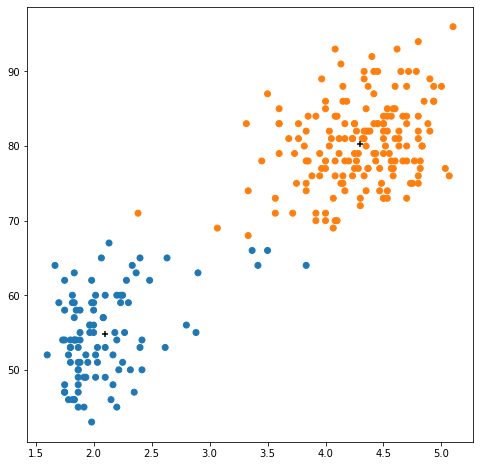

In [39]:
# We must map cluster labels to colors
colors = ("tab:blue", "tab:orange")
df['Colors'] = [colors[clus_id] for clus_id in clusters]

# Plot the clusters and centroids
plt.figure(figsize=(8,8))
plt.scatter(df['Eruption'], df['Waiting'], c=df['Colors'])
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.plot()

## Problems ##

Oh-snap! It looks as though our KMeans has made an error. The funny thing is that your custom implementation is going to make the same "mistake" as the scikit-learn model.

* Look closely at the far-left blue point. It sure looks a lot closer to the orange centroid that it does to the blue centroid.
* Now look closely at the far-right orange point. It looks to be closer to the blue centroid than to the orange centroid.

Why are these two samples mislabeled? Are there other points that are mislabled, just not to such an extreme? And why did we have to bring politics into a machine learning discussion?

*By the way, there are actually six samples that have been clustered incorrectly.*

The problem is that the two variables are using different scales. The eruption time is relatively small (<10) and the waiting time is relatively large (40-100). Variable with higher ranges have more influence on the overall outcome than variables with lower ranges. It's just an artifact of the way we calculate distance.

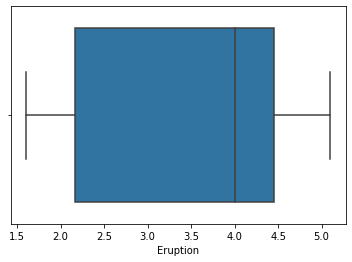

In [40]:
# Seaborn is a plotting library on top of matplotlib
# It has fancier graphs and a different visual style
import seaborn as sns
sns.boxplot(x=df['Eruption'])
plt.show()

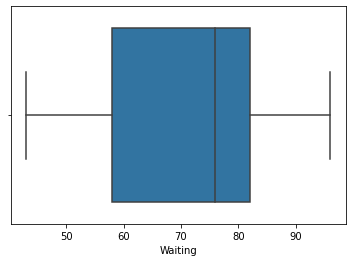

In [41]:
# Boxplots show the median value, Q1 and Q3 of the Interquartile Range (IRQ), and any outliers.
# Outliers are defined as being less than Q1-1.5*IQR or being more than Q3+1.5*IQR.
# There are no outliers shown in either of these two boxplots.
sns.boxplot(x=df['Waiting'])
plt.show()

## Normalization ##

We can mitigate this problem by scaling all variables to use the same range, between 0 and 1. After scaling, the distribution of datapoints will not change even though their literal values will be different. If done correctly, this will give each variable an equal weight without changing any of the statistical properties of the dataset.

There are several techniques to scale data. We will learn about one of the most common method, Normalization, today. Another  technique is called Standardization, but it is for another time.

Normalize each sample by subtracting the minimum value in the dataset. This will cause the minimum stample to take on the new value of zero. Then divide each sample by the dataset's range. The division will scale each sample properly and the maximum sample will take on a value of one.

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [42]:
# Here's the code by hand
def minmax_scaling(df_series):    
    min_val = min(df_series)
    max_val = max(df_series)
    return (df_series - min_val) / (max_val - min_val)

df['Waiting Normalized'] = minmax_scaling(df['Waiting'])
df['Eruption Normalized'] = minmax_scaling(df['Eruption'])
df.head()

,Eruption,Waiting,Colors,Waiting Normalized,Eruption Normalized
0,3.600,79,tab:orange,0.679245,0.571429
1,1.800,54,tab:blue,0.207547,0.057143
2,3.333,74,tab:orange,0.584906,0.495143
3,2.283,62,tab:blue,0.358491,0.195143
4,4.533,85,tab:orange,0.792453,0.838000


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Here's the same result using sklearn
scaler = MinMaxScaler()
df[['Waiting Normalized', 'Eruption Normalized']] = \
    scaler.fit_transform(df[['Waiting Normalized', 'Eruption Normalized']])
df.head()

,Eruption,Waiting,Colors,Waiting Normalized,Eruption Normalized
0,3.600,79,tab:orange,0.679245,0.571429
1,1.800,54,tab:blue,0.207547,0.057143
2,3.333,74,tab:orange,0.584906,0.495143
3,2.283,62,tab:blue,0.358491,0.195143
4,4.533,85,tab:orange,0.792453,0.838000


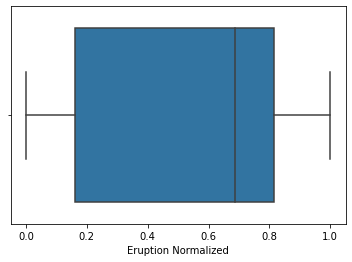

In [44]:
ax1 = sns.boxplot(x=df['Eruption Normalized'])
plt.show()

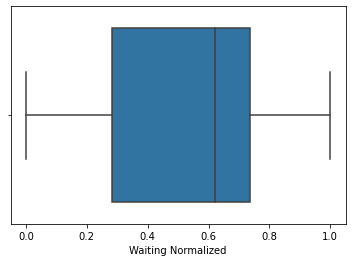

In [45]:
sns.boxplot(x=df['Waiting Normalized'])
plt.show()

## KMeans with Normalized Data ##

Recreate the model using normalized data and you'll see that all six of the mislabeled datapoints are now clustered correctly. Notice that we create two models: one model for the normalized data and then we repeat with the original data. This allows us to evaluate the two models side-by-side.

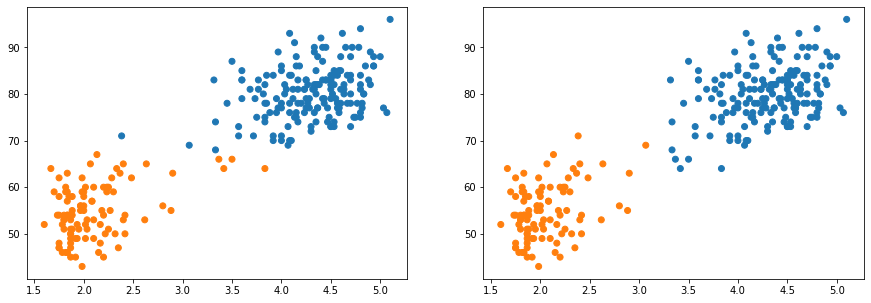

Your job is to use SKLearn to cluster the Old Faithful Geyser data as shown in the above diagram. The left diagram should use raw data and the right diagram should use normalized data.

In [46]:
# First, with the original data
km_original = KMeans(n_clusters=2, max_iter=10)
km_original.fit(df[['Eruption', 'Waiting']])
centroids_original = km_original.cluster_centers_
clusters_original = km_original.predict(df[['Eruption', 'Waiting']])

# Second, with the normalized data
km_normalized = KMeans(n_clusters=2, max_iter=10)
km_normalized.fit(df[['Eruption Normalized', 'Waiting Normalized']])
centroids_normalized = km_normalized.cluster_centers_
clusters_normalized = km_normalized.predict(df[['Eruption Normalized', 'Waiting Normalized']])

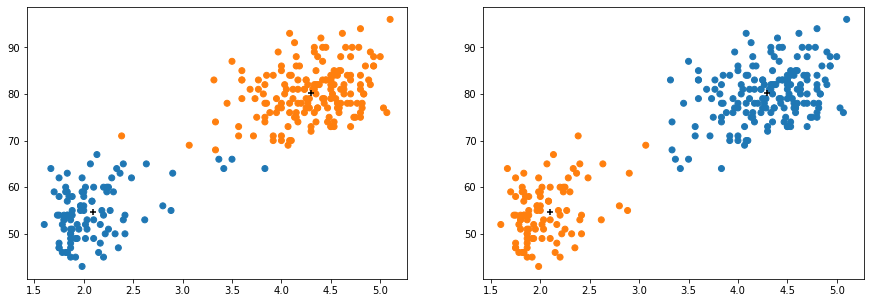

In [47]:
# It's a bit annoying, but the two models created opposite labels...
# to maintain consistent coloring we need to reverse the colors betwen plots
colors_fwd = ["tab:blue", "tab:orange"]
colors_rev = colors_fwd[::-1]
df['Colors'] = [colors_fwd[clus_id] for clus_id in clusters_original]
df['Colors Normalized'] = [colors_fwd[clus_id] for clus_id in clusters_normalized]

# It's OK to plot the normalized cluster labels on the original, unscaled data.
# As long as the dataframe are in the same data it will work fine.

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(df['Eruption'], df['Waiting'], c=df['Colors'])
ax[0].scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
ax[1].scatter(df['Eruption'], df['Waiting'], c=df['Colors Normalized'])
ax[1].scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.show()

## Choosing the Right K-Value ##

For these simple 2-D models, it's pretty easy for us to determine the ideal value for `k` by looking at the plot. But that technique won't work for more complicated datasets. However, there is a way that we can mathematically determine a k-value that is *likely* to be optimal.

We choose a reasonable k-value by calculating the Within-Cluster Sum of Squared Errors (WSSE), which measures the overall size of each cluster. We define the size of a cluster to be the sum of the distances from the centroid to each sample in the cluster. Small, dense clusters will lead to lower scores (e.g., low scores are good).

To choose the optimal k-value, we create a series of KMeans models each with a different number of clusters, starting at 1 and going to some upper maximum. For each of these models, we calculate the WSSE score and plot the results. As more clusters are added (e.g., `k` increases), the WSSE score decreases. Since lower scores indicate better models, we look towards the lower end. But as you keep adding clusters, there is a point of diminishing returns. This point is close to where the curve flattens out and is called the "elbow" of the curve. In some situations the elbow is very pronounced and in others it is more nuanced.

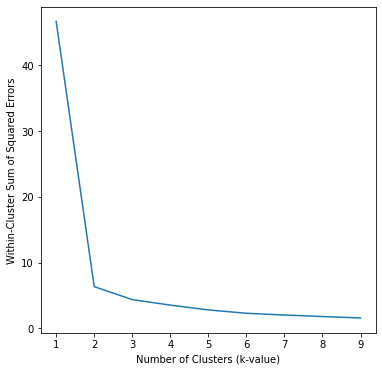

Let's start by calculating the WSSE for our Old Faithful Geyser Dataset:

In [48]:
df.head()

,Eruption,Waiting,Colors,Waiting Normalized,Eruption Normalized,Colors Normalized
0,3.600,79,tab:orange,0.679245,0.571429,tab:blue
1,1.800,54,tab:blue,0.207547,0.057143,tab:orange
2,3.333,74,tab:orange,0.584906,0.495143,tab:blue
3,2.283,62,tab:blue,0.358491,0.195143,tab:orange
4,4.533,85,tab:orange,0.792453,0.838000,tab:blue


In [49]:
# We only care about the normalized fields and we want cluster ID numbers instead of color names
df.drop(columns=["Eruption", "Waiting", "Colors"], inplace=True)
new_headings = {"Eruption Normalized":"x", "Waiting Normalized":"y", "Colors Normalized":"Cluster"} 
df.rename(columns=new_headings, inplace=True)
df['Cluster'] = df['Cluster'].map({"tab:blue":0, "tab:orange":1})
df.head()

,y,x,Cluster
0,0.679245,0.571429,0
1,0.207547,0.057143,1
2,0.584906,0.495143,0
3,0.358491,0.195143,1
4,0.792453,0.838000,0


In [50]:
# Convert the centroids from numpy arrays to regular lists
# Make sure to use the normalized centroid values!
centroids = list(zip(centroids_normalized[:,0], centroids_normalized[:,1]))
centroids

[(0.7709540229885056, 0.6990891346779441),
 (0.12818075801749296, 0.21967654986522916)]

In [51]:
# Bring the centroid's xy-coordinates into the DataFrame
df['cluster-x'] = df['Cluster'].apply(lambda idx: centroids[idx][0])
df['cluster-y'] = df['Cluster'].apply(lambda idx: centroids[idx][1])
df.drop(columns=['Cluster'], inplace=True)
df.head()

,y,x,cluster-x,cluster-y
0,0.679245,0.571429,0.770954,0.699089
1,0.207547,0.057143,0.128181,0.219677
2,0.584906,0.495143,0.770954,0.699089
3,0.358491,0.195143,0.128181,0.219677
4,0.792453,0.838000,0.770954,0.699089


In [52]:
# Use Euclidean Distance to calculate the squared error
df['error'] = (df['cluster-x'] - df['x']) ** 2 + (df['cluster-y'] - df['y']) ** 2
df.head()

,y,x,cluster-x,cluster-y,error
0,0.679245,0.571429,0.770954,0.699089,0.040204
1,0.207547,0.057143,0.128181,0.219677,0.005194
2,0.584906,0.495143,0.770954,0.699089,0.089110
3,0.358491,0.195143,0.128181,0.219677,0.023753
4,0.792453,0.838000,0.770954,0.699089,0.013212


In [53]:
# Add the individual errors together to get the overall WSSE value
wsse = df['error'].sum()
wsse

6.340439792650667

### Calculating WSSE with SKLearn ###

It took quite a few steps to calculate the Within-Cluster Sum of Squared Errors (WSSE) by hand. Why recreate the wheel if SciKit-Learn already calculates the WSSE for us? Not to worry, KMeans stores the WSSE in a variable called `inertia_`

Also, the good news is that WSSE is an $O(n)$ algorithm.

In [54]:
km = KMeans(n_clusters=2, max_iter=10)
km.fit(df[['x', 'y']])
wsse = km.inertia_
wsse

6.340439792650668

## Exercise ##

Can we automate the technique to work with more generic datasets where the solution is not so obvious? Let's try generating random blobs of data. We'll use a function from SciKit-Learn that creates handy test data. The function can create a random number of blobs so that we don't actually know the correct number of clusters. Instead, we can detect a reasonable value using the WSSE Elbow Method.

### Calculating WWSE for Random Dataset ###

Use [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) from to create a random dataset with anywhere from 5-15 clusters. Then write the code to generate a WSSE Elbow Plot.

After the code is done, you'll need to analyze the plot and pick the best number of clusters. Create a KMeans model with the best k-value and plot the resulting clusters. Did your WSSE Elbow Plot provide a good value for `k`?

***You can submit a python file (.py) or a jupyter notebook. A notebook is probably easier for this assignment.***

In [27]:
import random
from sklearn.datasets import make_blobs

cluster_count = random.randint(5, 15)
print("Original Cluster Count: {}".format(cluster_count))

# In machine learning, the input features are usually called "X" and the output labels are called "y"
# Note that X may have many dimensions... it is not the same as the x-axis (a single dimension)

(X, y) = make_blobs(n_samples=500, n_features=2, cluster_std=0.6, # HOW DO YOU SET THE NUMBER OF CLUSTERS?)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

SyntaxError: invalid syntax (857076336.py, line 12)

In [ ]:
# Add WWSE Elbow Plot Here

In [ ]:
# SET CLUSTER COUNT HERE BASED ON RESULTS OF WSSE ELBOW
cluster_count = 

km = KMeans(n_clusters=cluster_count, max_iter=25)
km.fit(X)

centroids = km.cluster_centers_
clusters = km.predict(X)

fig = plt.figure(figsize=(8, 8))
plt.scatter(x=X[:,0], y=X[:,1], c=clusters)
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.show()